In [1]:
import pandas as pd

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [10]:
for i in range(10):
    print("jkxnf akjnd fkjasn dfasnfdask")

jkxnf akjnd fkjasn dfasnfdask
jkxnf akjnd fkjasn dfasnfdask
jkxnf akjnd fkjasn dfasnfdask
jkxnf akjnd fkjasn dfasnfdask
jkxnf akjnd fkjasn dfasnfdask
jkxnf akjnd fkjasn dfasnfdask
jkxnf akjnd fkjasn dfasnfdask
jkxnf akjnd fkjasn dfasnfdask
jkxnf akjnd fkjasn dfasnfdask
jkxnf akjnd fkjasn dfasnfdask


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style

matplotlib.style.use("ggplot")

In [11]:
df = pd.read_csv("../data/TSLA.csv", sep=',')

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04 14:31:00+00:00,230.720,231.32,229.02,231.045,127249.0
1,2016-01-04 14:32:00+00:00,231.180,231.38,230.35,230.710,46577.0
2,2016-01-04 14:33:00+00:00,230.710,231.29,230.41,231.050,41492.0
3,2016-01-04 14:34:00+00:00,231.086,231.23,230.01,230.280,29712.0
4,2016-01-04 14:35:00+00:00,230.520,230.82,229.51,230.410,47301.0


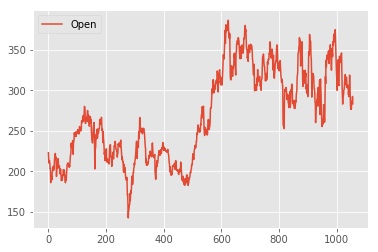

In [7]:
df.plot(y=["Open"])

# Modelling

In [8]:
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [18]:
pre = 5

In [43]:
def shift(df, end, start=1):
    df_res = df.iloc[end:, :]
    
    for i in range(start, end):
        col_names = {c: "{}_{:02d}".format(c, i) for c in df.columns}
        df_step = df.shift(i).iloc[end:, :].rename(columns=col_names)
        
        df_res = df_res.join(df_step)
        
    return df_res

In [44]:
shift(df, 2)

,Date,Open,High,Low,Close,Adj Close,Volume,Date_01,Open_01,High_01,Low_01,Close_01,Adj Close_01,Volume_01
2,2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900,2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500.0
3,2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400,2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900.0
4,2015-01-08,212.809998,213.800003,210.009995,210.619995,210.619995,3442500,2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400.0
5,2015-01-09,208.919998,209.979996,204.960007,206.660004,206.660004,4591300,2015-01-08,212.809998,213.800003,210.009995,210.619995,210.619995,3442500.0
6,2015-01-12,203.050003,204.470001,199.250000,202.210007,202.210007,5944200,2015-01-09,208.919998,209.979996,204.960007,206.660004,206.660004,4591300.0
7,2015-01-13,203.320007,207.610001,200.910004,204.250000,204.250000,4477300,2015-01-12,203.050003,204.470001,199.250000,202.210007,202.210007,5944200.0
8,2015-01-14,185.830002,195.199997,185.000000,192.690002,192.690002,11551900,2015-01-13,203.320007,207.610001,200.910004,204.250000,204.250000,4477300.0
9,2015-01-15,194.490005,195.750000,190.000000,191.869995,191.869995,5216500,2015-01-14,185.830002,195.199997,185.000000,192.690002,192.690002,11551900.0
10,2015-01-16,190.699997,194.490005,189.649994,193.070007,193.070007,3603200,2015-01-15,194.490005,195.750000,190.000000,191.869995,191.869995,5216500.0
11,2015-01-20,193.869995,194.119995,187.039993,191.929993,191.929993,4489400,2015-01-16,190.699997,194.490005,189.649994,193.070007,193.070007,3603200.0


In [45]:
df_train = shift(df, 3)

X = df_train.iloc[:, 8:].values
y = df_train["Close"].values

In [50]:
X.shape

(1054, 13)

In [51]:
num_params = X.shape[1]

num_params

13

In [53]:
import numpy as np

In [62]:
cov = np.diag(np.ones(5))
mu = np.zeros(5)

In [ ]:
with pm.Model() as linear_model:
    weights = pm.MvNormal('weights', mu=mu, cov=cov)
    noise = pm.Gamma('noise', alpha=2, beta=1)
    y_observed = pm.Normal('y_observed',
                mu=X.dot(weights),
                sd=noise,
                observed=y)

    prior = pm.sample_prior_predictive()
    posterior = pm.sample()
    posterior_pred = pm.sample_posterior_predictive(posterior)